# Proyecto TelecomX

Analisis de datos sobre churn de clientes en TelecomX.

## 📚 Diccionario de datos

- customerID: número de identificación único de cada cliente
- Churn: si el cliente dejó o no la empresa
- gender: género (masculino y femenino)
- SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- Partner: si el cliente tiene o no una pareja
- Dependents: si el cliente tiene o no dependientes
- tenure: meses de contrato del cliente
- PhoneService: suscripción al servicio telefónico
- MultipleLines: suscripción a más de una línea telefónica
- InternetService: suscripción a un proveedor de internet
- OnlineSecurity: suscripción adicional de seguridad en línea
- OnlineBackup: suscripción adicional de respaldo en línea
- DeviceProtection: suscripción adicional de protección del dispositivo
- TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
- StreamingTV: suscripción de televisión por cable
- StreamingMovies: suscripción de streaming de películas
- Contract: tipo de contrato
- PaperlessBilling: si el cliente prefiere recibir la factura en línea
- PaymentMethod: forma de pago
- Charges.Monthly: total de todos los servicios del cliente por mes
- Charges.Total: total gastado por el cliente

## 📌 Extracción

In [1]:
# Importamos pandas, abrimos el json desde url y lo cargamos en un df

import pandas as pd

url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

datos_raw = pd.read_json(url)
datos_raw.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


- Detectamos que hay columnas anidadas. Vamos a importar los datos con ***requests*** para manejar errores de link y luego normalizar el json con ***json_normalize*** antes de cargarlo a un df.

In [2]:
import pandas as pd
import requests
import json

# 1. Definimos la URL del json
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

try:
    # 2. Hacemos la petición (request) para obtener el texto crudo
    print("⏳ Descargando datos...")
    response = requests.get(url)
    response.raise_for_status() # Esto nos avisa si el link está roto (error 404, etc.)

    # 3. Convertimos ese texto a un objeto de Python
    data = response.json()
    print("✅ Datos descargados y leídos correctamente.")

    # 4. Normalizamos (aplanamos) el JSON. json_normalize convierte estructuras anidadas en columnas separadas.
    df = pd.json_normalize(data)

    # 5. Mostramos las primeras filas y las columnas resultantes
    print(f"\nEl DataFrame tiene {df.shape[0]} filas y {df.shape[1]} columnas.")
    print("\n--- Primeras 5 filas ---")
    print(df.head())

except requests.exceptions.HTTPError as e:
    print(f"❌ Error al descargar el archivo: {e}")
except json.JSONDecodeError:
    print(f"❌ El contenido descargado no es un JSON válido.")
except Exception as e:
    print(f"❌ Ocurrió un error inesperado: {e}")

⏳ Descargando datos...
✅ Datos descargados y leídos correctamente.

El DataFrame tiene 7267 filas y 21 columnas.

--- Primeras 5 filas ---
   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Ye

## 🔧 Transformación

### Verificación de inconsistencias

In [3]:
# Priumer analisis exploratorio
df.tail(5)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65
7266,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No phone service,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.6


- Valores repetidos: vamos a verificar si hayt registros duplicados en el df.

In [4]:
print(f'Registros duplicados: {df.duplicated().sum()}.')

Registros duplicados: 0.


- Valors nulos: verificamos si hay valores nulos.

In [5]:
print(f'Registros duplicados: {df.isnull().sum()}.')

Registros duplicados: customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64.


- Valores vacios o en blanco.

In [6]:
df.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


### Manejo de inconsistencias

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

- Lo primero que detectamos es que la columna account.Charges.Total esta como string en vez de float64. Vamos a arreglarlo.


In [8]:
# Convertimos la columna forzando los errores a NaN
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

# Verificamos cuántos valores se convirtieron en NaN
nulos = df['account.Charges.Total'].isna().sum()
print(f"Se encontraron {nulos} valores que no eran números y se convirtieron a NaN.")

Se encontraron 11 valores que no eran números y se convirtieron a NaN.


In [9]:
# Como son pocos los valores nulos, vamos a deshecharlos para no alterar el linaje de datos
df = df.dropna()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7256 non-null   object 
 1   Churn                      7256 non-null   object 
 2   customer.gender            7256 non-null   object 
 3   customer.SeniorCitizen     7256 non-null   int64  
 4   customer.Partner           7256 non-null   object 
 5   customer.Dependents        7256 non-null   object 
 6   customer.tenure            7256 non-null   int64  
 7   phone.PhoneService         7256 non-null   object 
 8   phone.MultipleLines        7256 non-null   object 
 9   internet.InternetService   7256 non-null   object 
 10  internet.OnlineSecurity    7256 non-null   object 
 11  internet.OnlineBackup      7256 non-null   object 
 12  internet.DeviceProtection  7256 non-null   object 
 13  internet.TechSupport       7256 non-null   object 
 1

- Ahora solo nos queda la columna ***Churn*** con valores vacios. Vamos a eliminarlos.

In [11]:
df = df[df['Churn'].str.strip() != '']
print('Números de filas luego de eliminar vacios en churn: ', len(df))

Números de filas luego de eliminar vacios en churn:  7032


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer.gender            7032 non-null   object 
 3   customer.SeniorCitizen     7032 non-null   int64  
 4   customer.Partner           7032 non-null   object 
 5   customer.Dependents        7032 non-null   object 
 6   customer.tenure            7032 non-null   int64  
 7   phone.PhoneService         7032 non-null   object 
 8   phone.MultipleLines        7032 non-null   object 
 9   internet.InternetService   7032 non-null   object 
 10  internet.OnlineSecurity    7032 non-null   object 
 11  internet.OnlineBackup      7032 non-null   object 
 12  internet.DeviceProtection  7032 non-null   object 
 13  internet.TechSupport       7032 non-null   object 
 1

### Estandarización y transformación de datos

- Cambiamos el nombre de las columnas para facilitar la lectura, especialmente de los stakeholders no técnicos.

In [13]:
columnas = {
    'customerID': 'id',
    'Churn': 'fuga',
    'customer.gender': 'genero',
    'customer.SeniorCitizen': 'tiene +60',
    'customer.Partner': 'tiene_pareja',
    'customer.Dependents': 'tiene_dependientes',
    'customer.tenure': 'tiempo_contrato',
    'phone.PhoneService': 'servicio_telefonico',
    'phone.MultipleLines': 'lineas_multiples',
    'internet.InternetService': 'servicio_internet',
    'internet.OnlineSecurity': 'seguridad_online',
    'internet.OnlineBackup': 'backup_online',
    'internet.DeviceProtection': 'proteccion_dispositivo',
    'internet.TechSupport': 'soporte_tecnico',
    'internet.StreamingTV': 'streaming_tv',
    'internet.StreamingMovies': 'streaming_peliculas',
    'account.Contract': 'tipo_contrato',
    'account.PaperlessBilling': 'factura_digital',
    'account.PaymentMethod': 'metodo_pago',
    'account.Charges.Monthly': 'valor_mensual',
    'account.Charges.Total': 'total_cobrado',
    }

df.rename(columns=columnas, inplace=True)
df.head()

,id,fuga,genero,tiene +60,tiene_pareja,tiene_dependientes,tiempo_contrato,servicio_telefonico,lineas_multiples,servicio_internet,...,backup_online,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,valor_mensual,total_cobrado
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


- Vamos a inspeccionar los valores unicos de cada columna, para detectar posibles desvios o errores de carga. Vamos a seleccionar las columnas categoricas y explorarlas una a una.

In [14]:
columnas_categoricas = list(df.columns[1:19]) # No incluimos el ID, porque son todos valores unicos...

columnas_categoricas

['fuga',
 'genero',
 'tiene +60',
 'tiene_pareja',
 'tiene_dependientes',
 'tiempo_contrato',
 'servicio_telefonico',
 'lineas_multiples',
 'servicio_internet',
 'seguridad_online',
 'backup_online',
 'proteccion_dispositivo',
 'soporte_tecnico',
 'streaming_tv',
 'streaming_peliculas',
 'tipo_contrato',
 'factura_digital',
 'metodo_pago']

In [15]:
# Sacamos tiempo_contrato (tenure) porque son valores diferentes..
columnas_categoricas.remove('tiempo_contrato')
columnas_categoricas

['fuga',
 'genero',
 'tiene +60',
 'tiene_pareja',
 'tiene_dependientes',
 'servicio_telefonico',
 'lineas_multiples',
 'servicio_internet',
 'seguridad_online',
 'backup_online',
 'proteccion_dispositivo',
 'soporte_tecnico',
 'streaming_tv',
 'streaming_peliculas',
 'tipo_contrato',
 'factura_digital',
 'metodo_pago']

In [16]:
# Verificación de valores unicos de cada columna categorica

for col in columnas_categoricas:
    print(f"Valores únicos en la columna {col}: {df[col].unique()}.")

Valores únicos en la columna fuga: ['No' 'Yes'].
Valores únicos en la columna genero: ['Female' 'Male'].
Valores únicos en la columna tiene +60: [0 1].
Valores únicos en la columna tiene_pareja: ['Yes' 'No'].
Valores únicos en la columna tiene_dependientes: ['Yes' 'No'].
Valores únicos en la columna servicio_telefonico: ['Yes' 'No'].
Valores únicos en la columna lineas_multiples: ['No' 'Yes' 'No phone service'].
Valores únicos en la columna servicio_internet: ['DSL' 'Fiber optic' 'No'].
Valores únicos en la columna seguridad_online: ['No' 'Yes' 'No internet service'].
Valores únicos en la columna backup_online: ['Yes' 'No' 'No internet service'].
Valores únicos en la columna proteccion_dispositivo: ['No' 'Yes' 'No internet service'].
Valores únicos en la columna soporte_tecnico: ['Yes' 'No' 'No internet service'].
Valores únicos en la columna streaming_tv: ['Yes' 'No' 'No internet service'].
Valores únicos en la columna streaming_peliculas: ['No' 'Yes' 'No internet service'].
Valores ú

- No se observan grandes irregularidades. Pero vamos a unificar el formato de las columnas. Primero nos encargamos de las columnas que solo tienen Yes No.

In [17]:
# 1. Definimos el mapeo  para Yes / No
mapa_booleano = {'Yes': 'Sí', 'No': 'No'}

# 2. Identificamos las columnas que contienen 'Yes' y 'No'
#    (Excluimos las que tienen 3 opciones como "No internet service" podrian ser categoria aparte)

cols_yes_no = []
for col in df.columns:
    # Revisamos si es tipo objeto (texto/string) y si sus valores únicos son solo Yes/No o nulo
    if df[col].dtype == 'object':
        unique_vals = set(df[col].unique())

        # Si los valores son subconjunto de Yes No, agregamos a nuestro vector
        if unique_vals.issubset({'Yes', 'No'}):
            cols_yes_no.append(col)

print(f"Columnas detectadas para convertir: {cols_yes_no}")

# 3. Aplicamos el reemplazo
for col in cols_yes_no:
    df[col] = df[col].map(mapa_booleano)


df.head()

Columnas detectadas para convertir: ['fuga', 'tiene_pareja', 'tiene_dependientes', 'servicio_telefonico', 'factura_digital']


,id,fuga,genero,tiene +60,tiene_pareja,tiene_dependientes,tiempo_contrato,servicio_telefonico,lineas_multiples,servicio_internet,...,backup_online,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,valor_mensual,total_cobrado
0,0002-ORFBO,No,Female,0,Sí,Sí,9,Sí,No,DSL,...,Yes,No,Yes,Yes,No,One year,Sí,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Sí,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Sí,Male,0,No,No,4,Sí,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Sí,Electronic check,73.9,280.85
3,0011-IGKFF,Sí,Male,1,Sí,No,13,Sí,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Sí,Electronic check,98.0,1237.85
4,0013-EXCHZ,Sí,Female,1,Sí,No,3,Sí,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Sí,Mailed check,83.9,267.40


- Continuamos con las columnas restantes

In [18]:
# 1. Definimos el mapeo con un diccionario para aplicar los cambios
mapa = {'Yes': 'Sí', 'No': 'No',
        'No phone service': 'Sin servicio telefonico', 'No internet service': 'Sin servicio de Internet',
        'One year': 'Anual', 'Month-to-month': 'Mensual', 'Two year': 'Bianual',
        'Mailed check': 'Cheque por correo', 'Electronic check': 'Cheque electronico',
        'Credit card (automatic)': 'Tarjeta de credito (automatico)', 'Bank transfer (automatic)': 'Transferencia bancaria (automatico)'
        }

# 2. Identificamos las columnas a normalizar
cols_normalizar = ['lineas_multiples', 'seguridad_online', 'backup_online',
                   'proteccion_dispositivo', 'soporte_tecnico', 'streaming_tv',
                   'streaming_peliculas', 'tipo_contrato', 'metodo_pago']




# 3. Aplicamos el reemplazo
for col in cols_normalizar:
    df[col] = df[col].map(mapa)


print(f"Columnas detectadas para convertir: {len(cols_normalizar)}")

# la columna tiene + 60 esta en boolean, la pasamos a Si / No tambien

df['tiene +60'] = df['tiene +60'].astype(str)
df['tiene +60'] = df['tiene +60'].map({'1': 'Sí', '0': 'No'})

# la columna servicio_internet
df['servicio_internet'] = df['servicio_internet'].map({'Fiber optic': 'Fibra optica', 'DSL': 'DSL', 'No': 'No'})

# la columna genero
df['genero'] = df['genero'].map({'Female': 'Femenino', 'Male': 'Masculino'})

df.head()

Columnas detectadas para convertir: 9


,id,fuga,genero,tiene +60,tiene_pareja,tiene_dependientes,tiempo_contrato,servicio_telefonico,lineas_multiples,servicio_internet,...,backup_online,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,valor_mensual,total_cobrado
0,0002-ORFBO,No,Femenino,No,Sí,Sí,9,Sí,No,DSL,...,Sí,No,Sí,Sí,No,Anual,Sí,Cheque por correo,65.6,593.30
1,0003-MKNFE,No,Masculino,No,No,No,9,Sí,Sí,DSL,...,No,No,No,No,Sí,Mensual,No,Cheque por correo,59.9,542.40
2,0004-TLHLJ,Sí,Masculino,No,No,No,4,Sí,No,Fibra optica,...,No,Sí,No,No,No,Mensual,Sí,Cheque electronico,73.9,280.85
3,0011-IGKFF,Sí,Masculino,Sí,Sí,No,13,Sí,No,Fibra optica,...,Sí,Sí,No,Sí,Sí,Mensual,Sí,Cheque electronico,98.0,1237.85
4,0013-EXCHZ,Sí,Femenino,Sí,Sí,No,3,Sí,No,Fibra optica,...,No,No,Sí,Sí,No,Mensual,Sí,Cheque por correo,83.9,267.40


In [19]:
# Verificación de valores unicos de cada columna categorica

for col in columnas_categoricas:
    print(f"Valores únicos en la columna {col}: {df[col].unique()}.")

Valores únicos en la columna fuga: ['No' 'Sí'].
Valores únicos en la columna genero: ['Femenino' 'Masculino'].
Valores únicos en la columna tiene +60: ['No' 'Sí'].
Valores únicos en la columna tiene_pareja: ['Sí' 'No'].
Valores únicos en la columna tiene_dependientes: ['Sí' 'No'].
Valores únicos en la columna servicio_telefonico: ['Sí' 'No'].
Valores únicos en la columna lineas_multiples: ['No' 'Sí' 'Sin servicio telefonico'].
Valores únicos en la columna servicio_internet: ['DSL' 'Fibra optica' 'No'].
Valores únicos en la columna seguridad_online: ['No' 'Sí' 'Sin servicio de Internet'].
Valores únicos en la columna backup_online: ['Sí' 'No' 'Sin servicio de Internet'].
Valores únicos en la columna proteccion_dispositivo: ['No' 'Sí' 'Sin servicio de Internet'].
Valores únicos en la columna soporte_tecnico: ['Sí' 'No' 'Sin servicio de Internet'].
Valores únicos en la columna streaming_tv: ['Sí' 'No' 'Sin servicio de Internet'].
Valores únicos en la columna streaming_peliculas: ['No' 'Sí

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      7032 non-null   object 
 1   fuga                    7032 non-null   object 
 2   genero                  7032 non-null   object 
 3   tiene +60               7032 non-null   object 
 4   tiene_pareja            7032 non-null   object 
 5   tiene_dependientes      7032 non-null   object 
 6   tiempo_contrato         7032 non-null   int64  
 7   servicio_telefonico     7032 non-null   object 
 8   lineas_multiples        7032 non-null   object 
 9   servicio_internet       7032 non-null   object 
 10  seguridad_online        7032 non-null   object 
 11  backup_online           7032 non-null   object 
 12  proteccion_dispositivo  7032 non-null   object 
 13  soporte_tecnico         7032 non-null   object 
 14  streaming_tv            7032 non-null   objec

### Crear columna 'cuentas_diarias'
Vamos a crear una columna que contenga los gastos diarios.

In [21]:
df['cuentas_diarias'] = df['valor_mensual'] / 30
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      7032 non-null   object 
 1   fuga                    7032 non-null   object 
 2   genero                  7032 non-null   object 
 3   tiene +60               7032 non-null   object 
 4   tiene_pareja            7032 non-null   object 
 5   tiene_dependientes      7032 non-null   object 
 6   tiempo_contrato         7032 non-null   int64  
 7   servicio_telefonico     7032 non-null   object 
 8   lineas_multiples        7032 non-null   object 
 9   servicio_internet       7032 non-null   object 
 10  seguridad_online        7032 non-null   object 
 11  backup_online           7032 non-null   object 
 12  proteccion_dispositivo  7032 non-null   object 
 13  soporte_tecnico         7032 non-null   object 
 14  streaming_tv            7032 non-null   objec

## 📊 Carga y análisis

1) Análisis Descriptivo

In [22]:
df.describe()

,tiempo_contrato,valor_mensual,total_cobrado,cuentas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,2.159940
std,24.545260,30.085974,2266.771362,1.002866
min,1.000000,18.250000,18.800000,0.608333
25%,9.000000,35.587500,401.450000,1.186250
50%,29.000000,70.350000,1397.475000,2.345000
75%,55.000000,89.862500,3794.737500,2.995417
max,72.000000,118.750000,8684.800000,3.958333


2) Distribución de la fuga (***Churn***)

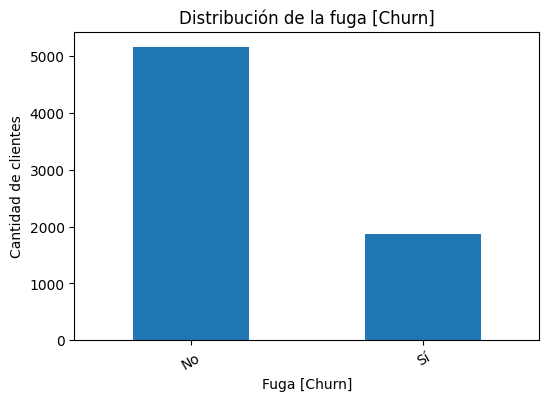

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
df['fuga'].value_counts().plot(kind='bar')
plt.title('Distribución de la fuga [Churn]')
plt.xlabel('Fuga [Churn]')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=30)
plt.show()

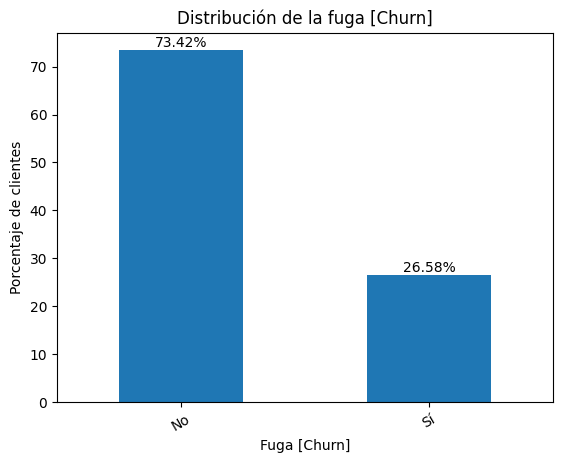

In [38]:
# Porcentaje de fuga [Churn] para comprender mejor
porcentaje = df['fuga'].value_counts(normalize=True) * 100
porcentaje.plot(kind='bar')
plt.title('Distribución de la fuga [Churn]')
plt.xlabel('Fuga [Churn]')
plt.ylabel('Porcentaje de clientes')
plt.xticks(rotation=30)

for i, v in enumerate(porcentaje):
    plt.text(i, v, f'{v:.2f}%', ha='center', va='bottom')

plt.show()

In [39]:
# La distribución por genero es similar, no esta afectando la fuga de clientes

import plotly.express as px

px.histogram(df, x='genero', text_auto=True, color='fuga', barmode='group', title='Distribución de la fuga [Churn]')

In [41]:
# Vamos analizar el churn por tiempo_contrato (tenure)
# Podemos ver que la mayoria del churn se centra en los primeros meses, especialmente [0-1]
# luego cuando el tiempo_contrato aumenta, disminuye el churn

px.histogram(df, x='tiempo_contrato', text_auto=True, color='fuga', barmode='group', title='Distribución de la fuga [Churn] por tiempo de contrato')


In [42]:
# vamos a ver el churn por tipo de contrato:
# La mayoria de la fuga se produce en los contratos mensuales

px.histogram(df, x='tipo_contrato', text_auto=True, color='fuga', barmode='group', title='Distribución de la fuga [Churn] por tipo de contrato')


In [43]:
# Fuga por tipo de servicio_internet:
# El servicio de fibra optica tiene mayores fugas
px.histogram(df, x='servicio_internet', text_auto=True, color='fuga', barmode='group', title='Distribución de la fuga [Churn] por tipo de servicio_internet')



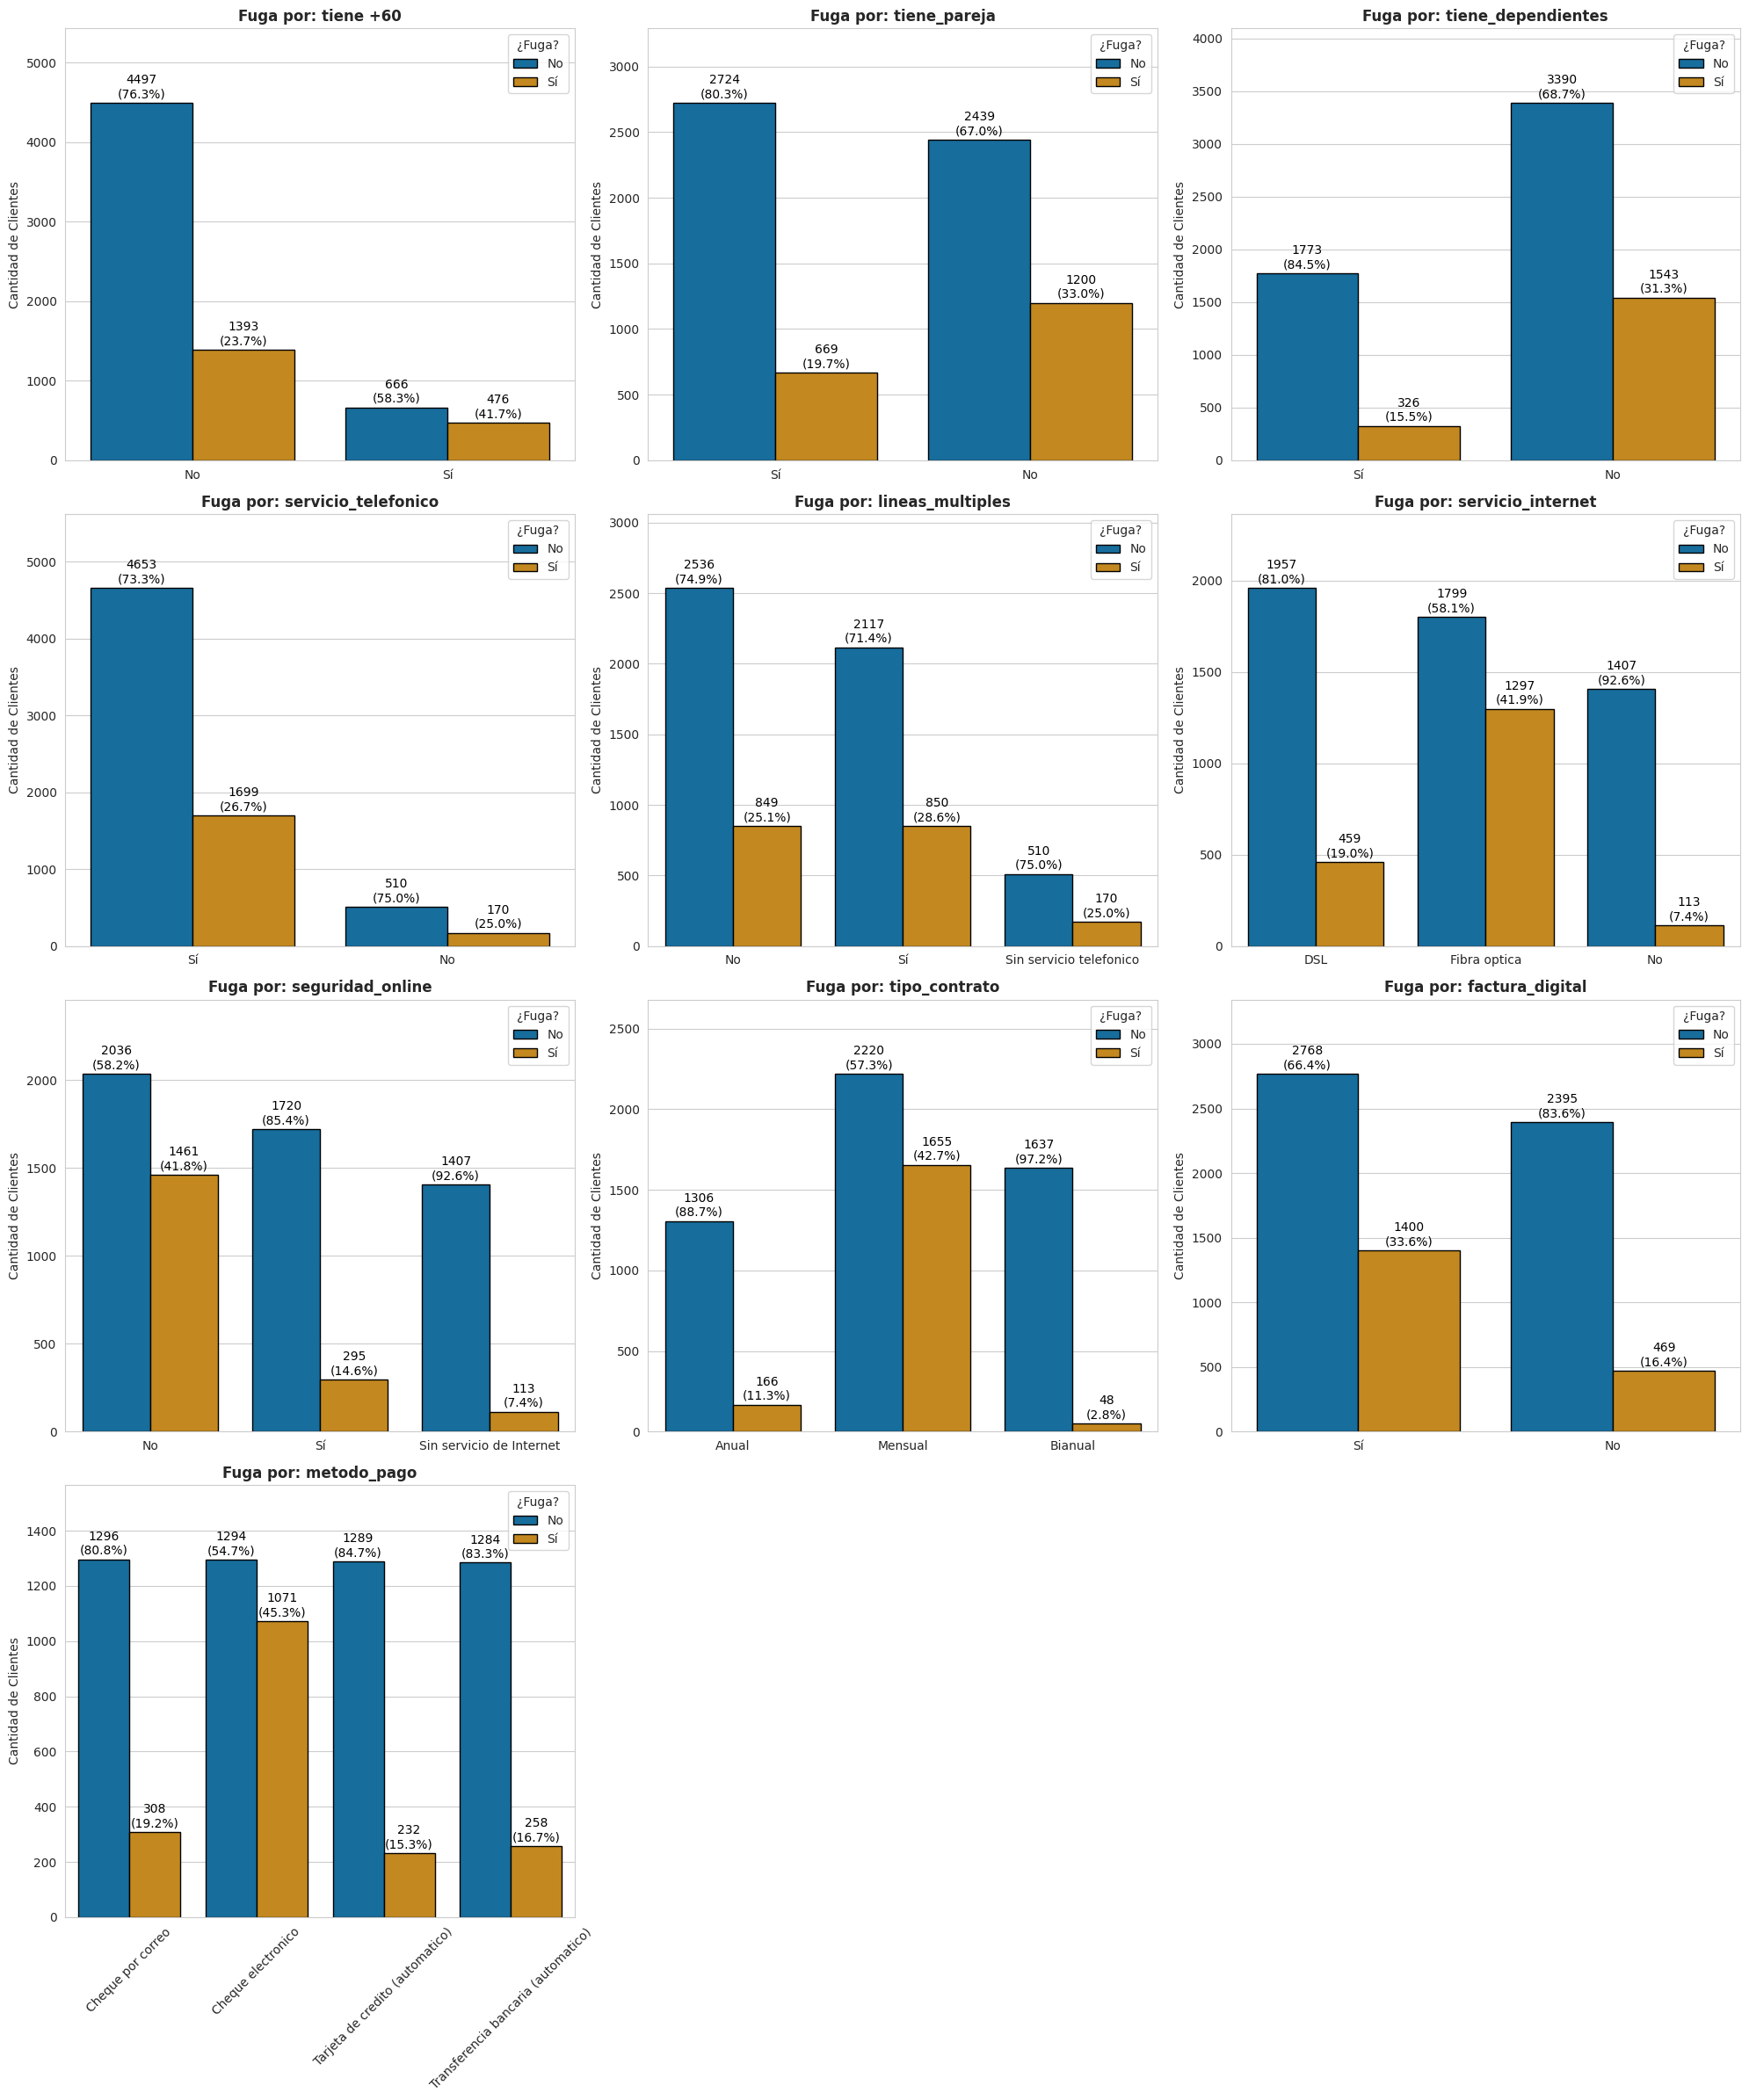

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np

# --- 1. CONFIGURACIÓN INICIAL ---
columnas_a_analizar = [
    'tiene +60',
    'tiene_pareja',
    'tiene_dependientes',
    'servicio_telefonico',
    'lineas_multiples',
    'servicio_internet',
    'seguridad_online',
    'tipo_contrato',
    'factura_digital',
    'metodo_pago'
]

# Configuración visual
sns.set_style('whitegrid')
palette_colors = "colorblind"

# --- 2. CÁLCULO DINÁMICO DEL GRID ---
num_plots = len(columnas_a_analizar)
cols = 3
rows = math.ceil(num_plots / cols)

fig, axs = plt.subplots(rows, cols, figsize=(20, 6 * rows)) # Aumenté un poco la altura
axs = axs.flatten()

# --- 3. LOOP DE GENERACIÓN DE GRÁFICOS ---
for i, col in enumerate(columnas_a_analizar):
    if col in df.columns:
        # A. Creamos el gráfico de CONTEO (Countplot) sobre la base original
        sns.countplot(
            data=df,
            x=col,
            hue='fuga',
            ax=axs[i],
            palette=palette_colors,
            edgecolor="black"
        )

        # B. Títulos y etiquetas básicas
        axs[i].set_title(f'Fuga por: {col}', fontweight='bold', fontsize=12)
        axs[i].set_ylabel('Cantidad de Clientes')
        axs[i].set_xlabel('')
        axs[i].legend(title='¿Fuga?', loc='upper right')

        # C. LÓGICA PARA ETIQUETAS DE PORCENTAJE
        # 1. Calculamos el total de personas en cada categoría del eje X (ej: Total Fibra, Total DSL)
        total_por_categoria = df[col].value_counts()

        # 2. Obtenemos el orden de las categorías que dibujó Seaborn
        xticks_labels = [label.get_text() for label in axs[i].get_xticklabels()]

        # 3. Iteramos sobre cada barra (patch) del gráfico actual
        for p in axs[i].patches:
            height = p.get_height() # La altura es la cantidad de personas

            # Si la barra tiene altura (no es NaN ni 0), ponemos la etiqueta
            if math.isfinite(height) and height > 0:
                # Truco matemático para saber a qué categoría pertenece la barra:
                # Buscamos el centro de la barra en el eje X
                x_idx = int(np.round(p.get_x() + p.get_width() / 2))

                # Obtenemos el nombre de la categoría (ej: "Fiber optic") usando el índice
                # (Protegemos con try/except por si el índice se sale de rango en casos raros)
                try:
                    cat_name = xticks_labels[x_idx]
                    total_grupo = total_por_categoria[cat_name]
                except:
                    total_grupo = 1 # Evitar división por cero si algo falla

                # Calculamos el porcentaje que representa esta barra DENTRO de su grupo
                porcentaje = 100 * height / total_grupo

                # Texto a mostrar: "Cantidad\n(Porcentaje%)"
                label_text = f'{int(height)}\n({porcentaje:.1f}%)'

                axs[i].annotate(
                    label_text,
                    (p.get_x() + p.get_width() / 2., height),
                    ha = 'center', va = 'bottom', # Centrado y justo encima de la barra
                    fontsize=10,
                    color='black',
                    xytext=(0, 2),
                    textcoords='offset points'
                )

        # Ajuste extra: Subimos el límite Y un poco para que quepan los textos de arriba
        ymax = axs[i].get_ylim()[1]
        axs[i].set_ylim(0, ymax * 1.15)

        # Rotamos etiquetas si son muchas
        if df[col].nunique() > 3:
            axs[i].tick_params(axis='x', rotation=45)

    else:
        # Si la columna no existe, ocultamos el eje para que no se vea feo
        axs[i].axis('off')

# --- 4. LIMPIEZA FINAL ---
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

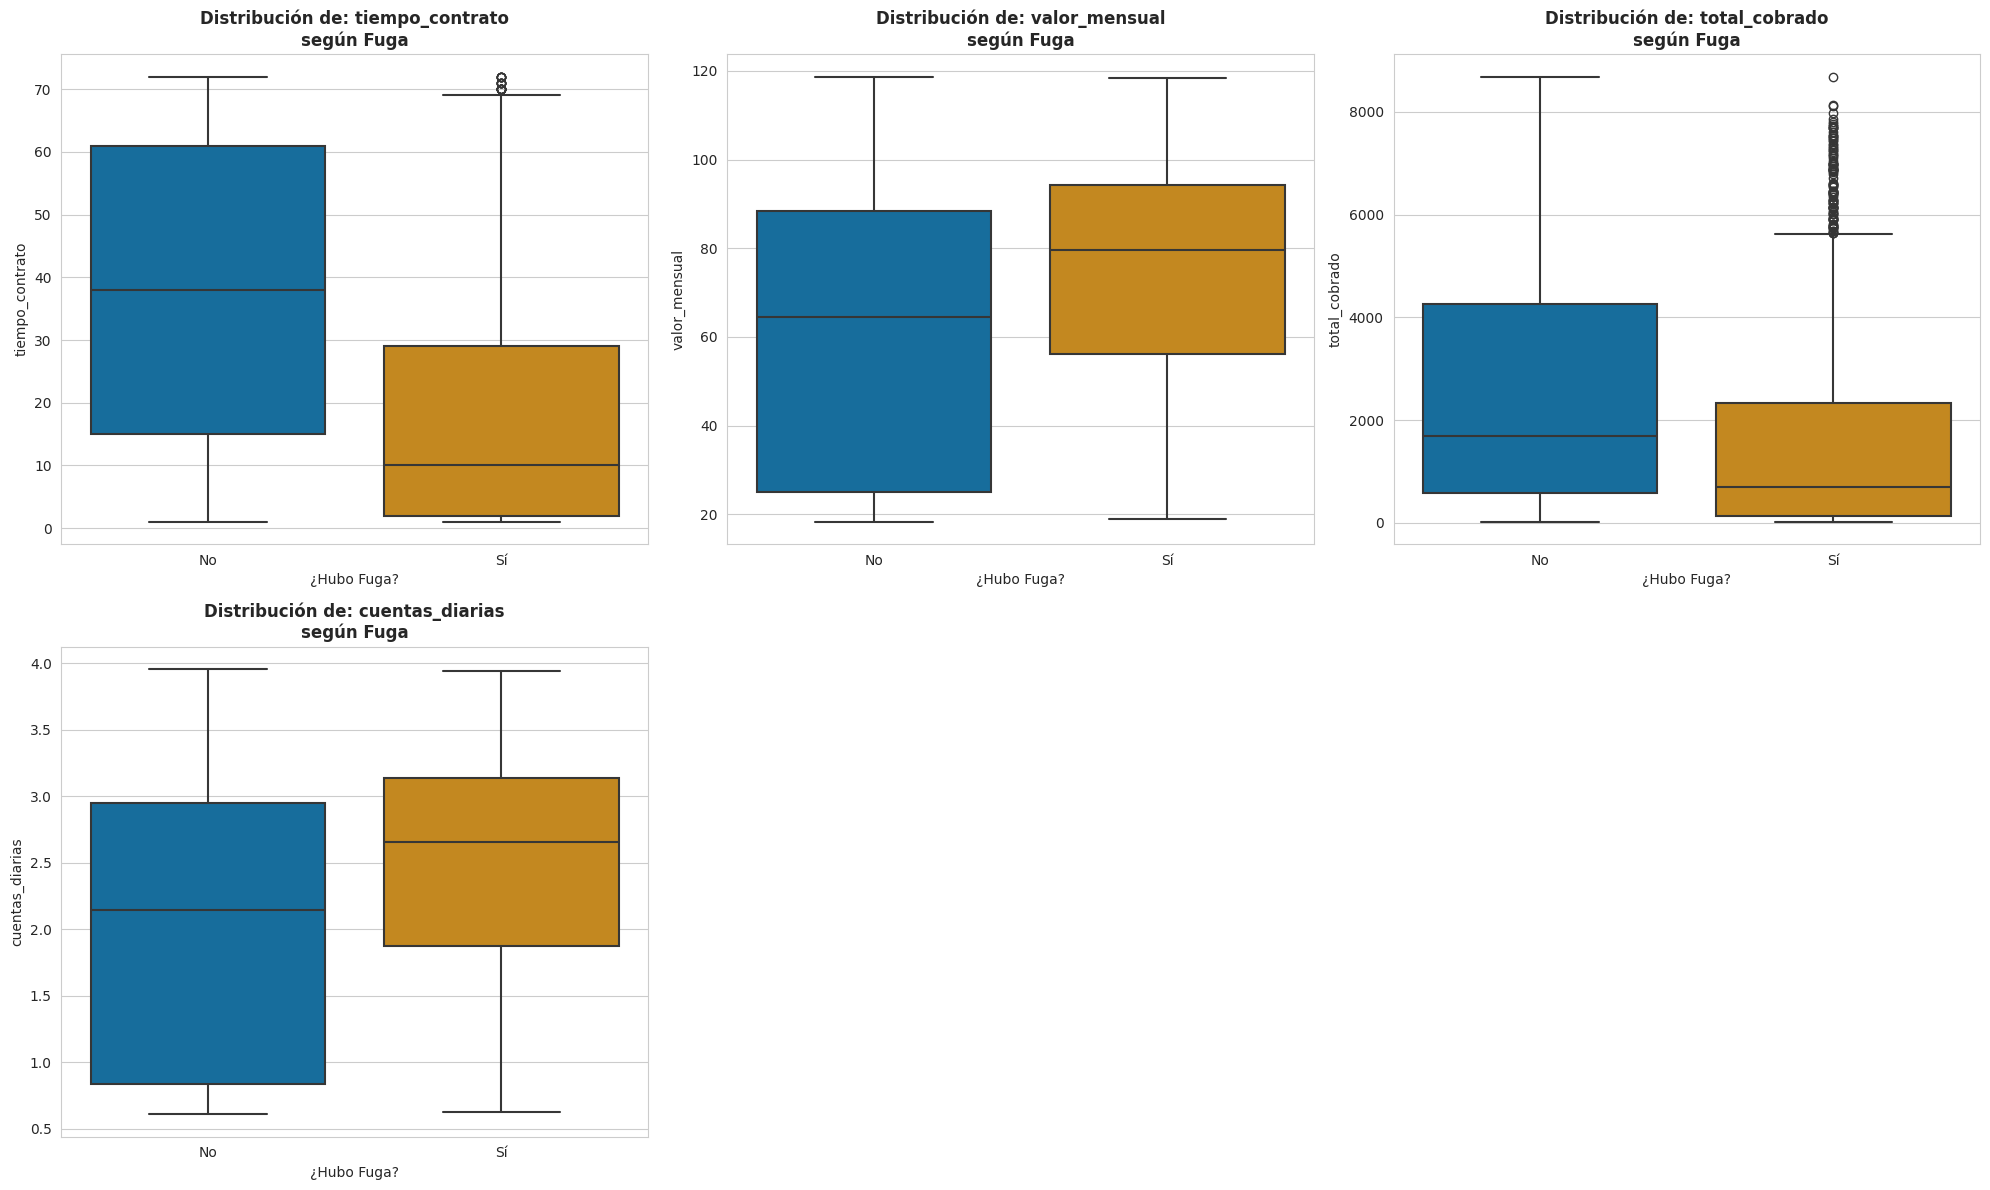

In [59]:
# Veamos las columnas numericas vs la fuga

import matplotlib.pyplot as plt
import seaborn as sns
import math

# --- 1. CONFIGURACIÓN INICIAL ---
# Lista de variables numéricas a analizar (Tus nombres personalizados)
columnas_numericas = [
    'tiempo_contrato',     # tenure
    'valor_mensual',       # MonthlyCharges
    'total_cobrado',       # TotalCharges
    'cuentas_diarias'      # por cuenta diaria
]

# Configuración visual
sns.set_style("whitegrid")
palette_colors = "colorblind"

# --- 2. CÁLCULO DINÁMICO DEL GRID ---
num_plots = len(columnas_numericas)
cols = 3  # Columnas por fila
rows = math.ceil(num_plots / cols)

fig, axs = plt.subplots(rows, cols, figsize=(20, 6 * rows))

# Si hay un solo gráfico o una sola fila, axs no es una lista plana, hay que asegurarnos
if num_plots > 1:
    axs = axs.flatten()
else:
    axs = [axs] # Lo convertimos en lista para que el loop funcione igual

# --- 3. LOOP DE GENERACIÓN DE GRÁFICOS ---
for i, col in enumerate(columnas_numericas):
    if col in df.columns:
        # Usamos BOXPLOT para numéricas
        sns.boxplot(
            data=df,
            x='fuga',       # Eje X: Categoría (Fuga)
            y=col,          # Eje Y: Variable numérica
            hue='fuga',     # Asignamos color basado en fuga
            legend=False,   # Ocultamos leyenda redundante
            ax=axs[i],
            palette=palette_colors,
            linewidth=1.5
        )

        # Títulos y etiquetas
        axs[i].set_title(f'Distribución de: {col}\nsegún Fuga', fontweight='bold', fontsize=12)
        axs[i].set_xlabel('¿Hubo Fuga?')
        axs[i].set_ylabel(col)

    else:
        print(f"⚠️ Advertencia: La columna '{col}' no está en el DataFrame.")
        if num_plots > 1:
            axs[i].axis('off')

# --- 4. LIMPIEZA FINAL ---
# Borramos los ejes vacíos si sobran
if num_plots > 1:
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

## 📄Informe final

### 0. Introducción

Hipotesis: Hay un porcentaja alto de fuga en los clientes de Telecom X.
Vamos a analizar que clientes son los más propensos a hacer ***fuga*** (Churn) e intentar destacar sus principales caracteristicas.


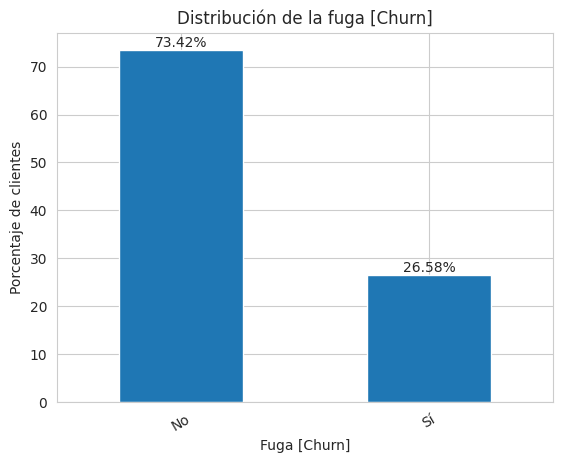

In [73]:
# Porcentaje de fuga [Churn] para comprender mejor
porcentaje = df['fuga'].value_counts(normalize=True) * 100
porcentaje.plot(kind='bar')
plt.title('Distribución de la fuga [Churn]')
plt.xlabel('Fuga [Churn]')
plt.ylabel('Porcentaje de clientes')
plt.xticks(rotation=30)

for i, v in enumerate(porcentaje):
    plt.text(i, v, f'{v:.2f}%', ha='center', va='bottom')

plt.show()

### 1. Quienes hacen churn: Análisis de ***Fuga*** (Churn) de los clientes por Categorías 📊

📝 Insight: Los clientes que presentan los porcentajes de abandono más altos son:
- Con contrato_tipo ***Mensual***: 42.7, mientras los clientes con contrato anual son 11.3% y los bianuales 2.8%.
- El servicio de internet de ***Fibra Óptica***: 41.9% versus 19.0% del DSL.
- El método de pago ***Cheque electrónico*** presenta una fuga de 45.3% .
- Aunque son clientes minoritarios, la tasa de fuga de los ***clientes +60*** es muy superior al resto (41.7% vs 23.7%).
- La tasa se fuga es superior en los clientes ***sin pareja*** (33.0% vs 19.7%).
- Tambien se observa una fuga muy superior en los clientes ***sin dependientes*** (31.3% vs 15.5%).
- Los clientes con factura_digital tienen una fuga de 33.6% vs 16.4% que no tienen ese servicio.

Por ultimo podemos señalar que el porcentaje de fuga aumementa considerablemente en los clientes que no tienen ***seguridad_online***: 41.8% vs 14.6% de los que si la contratan. El servicio de seguridad online puede ayudar a tener una mejor experiencia en internet y asi aumentar la retención.

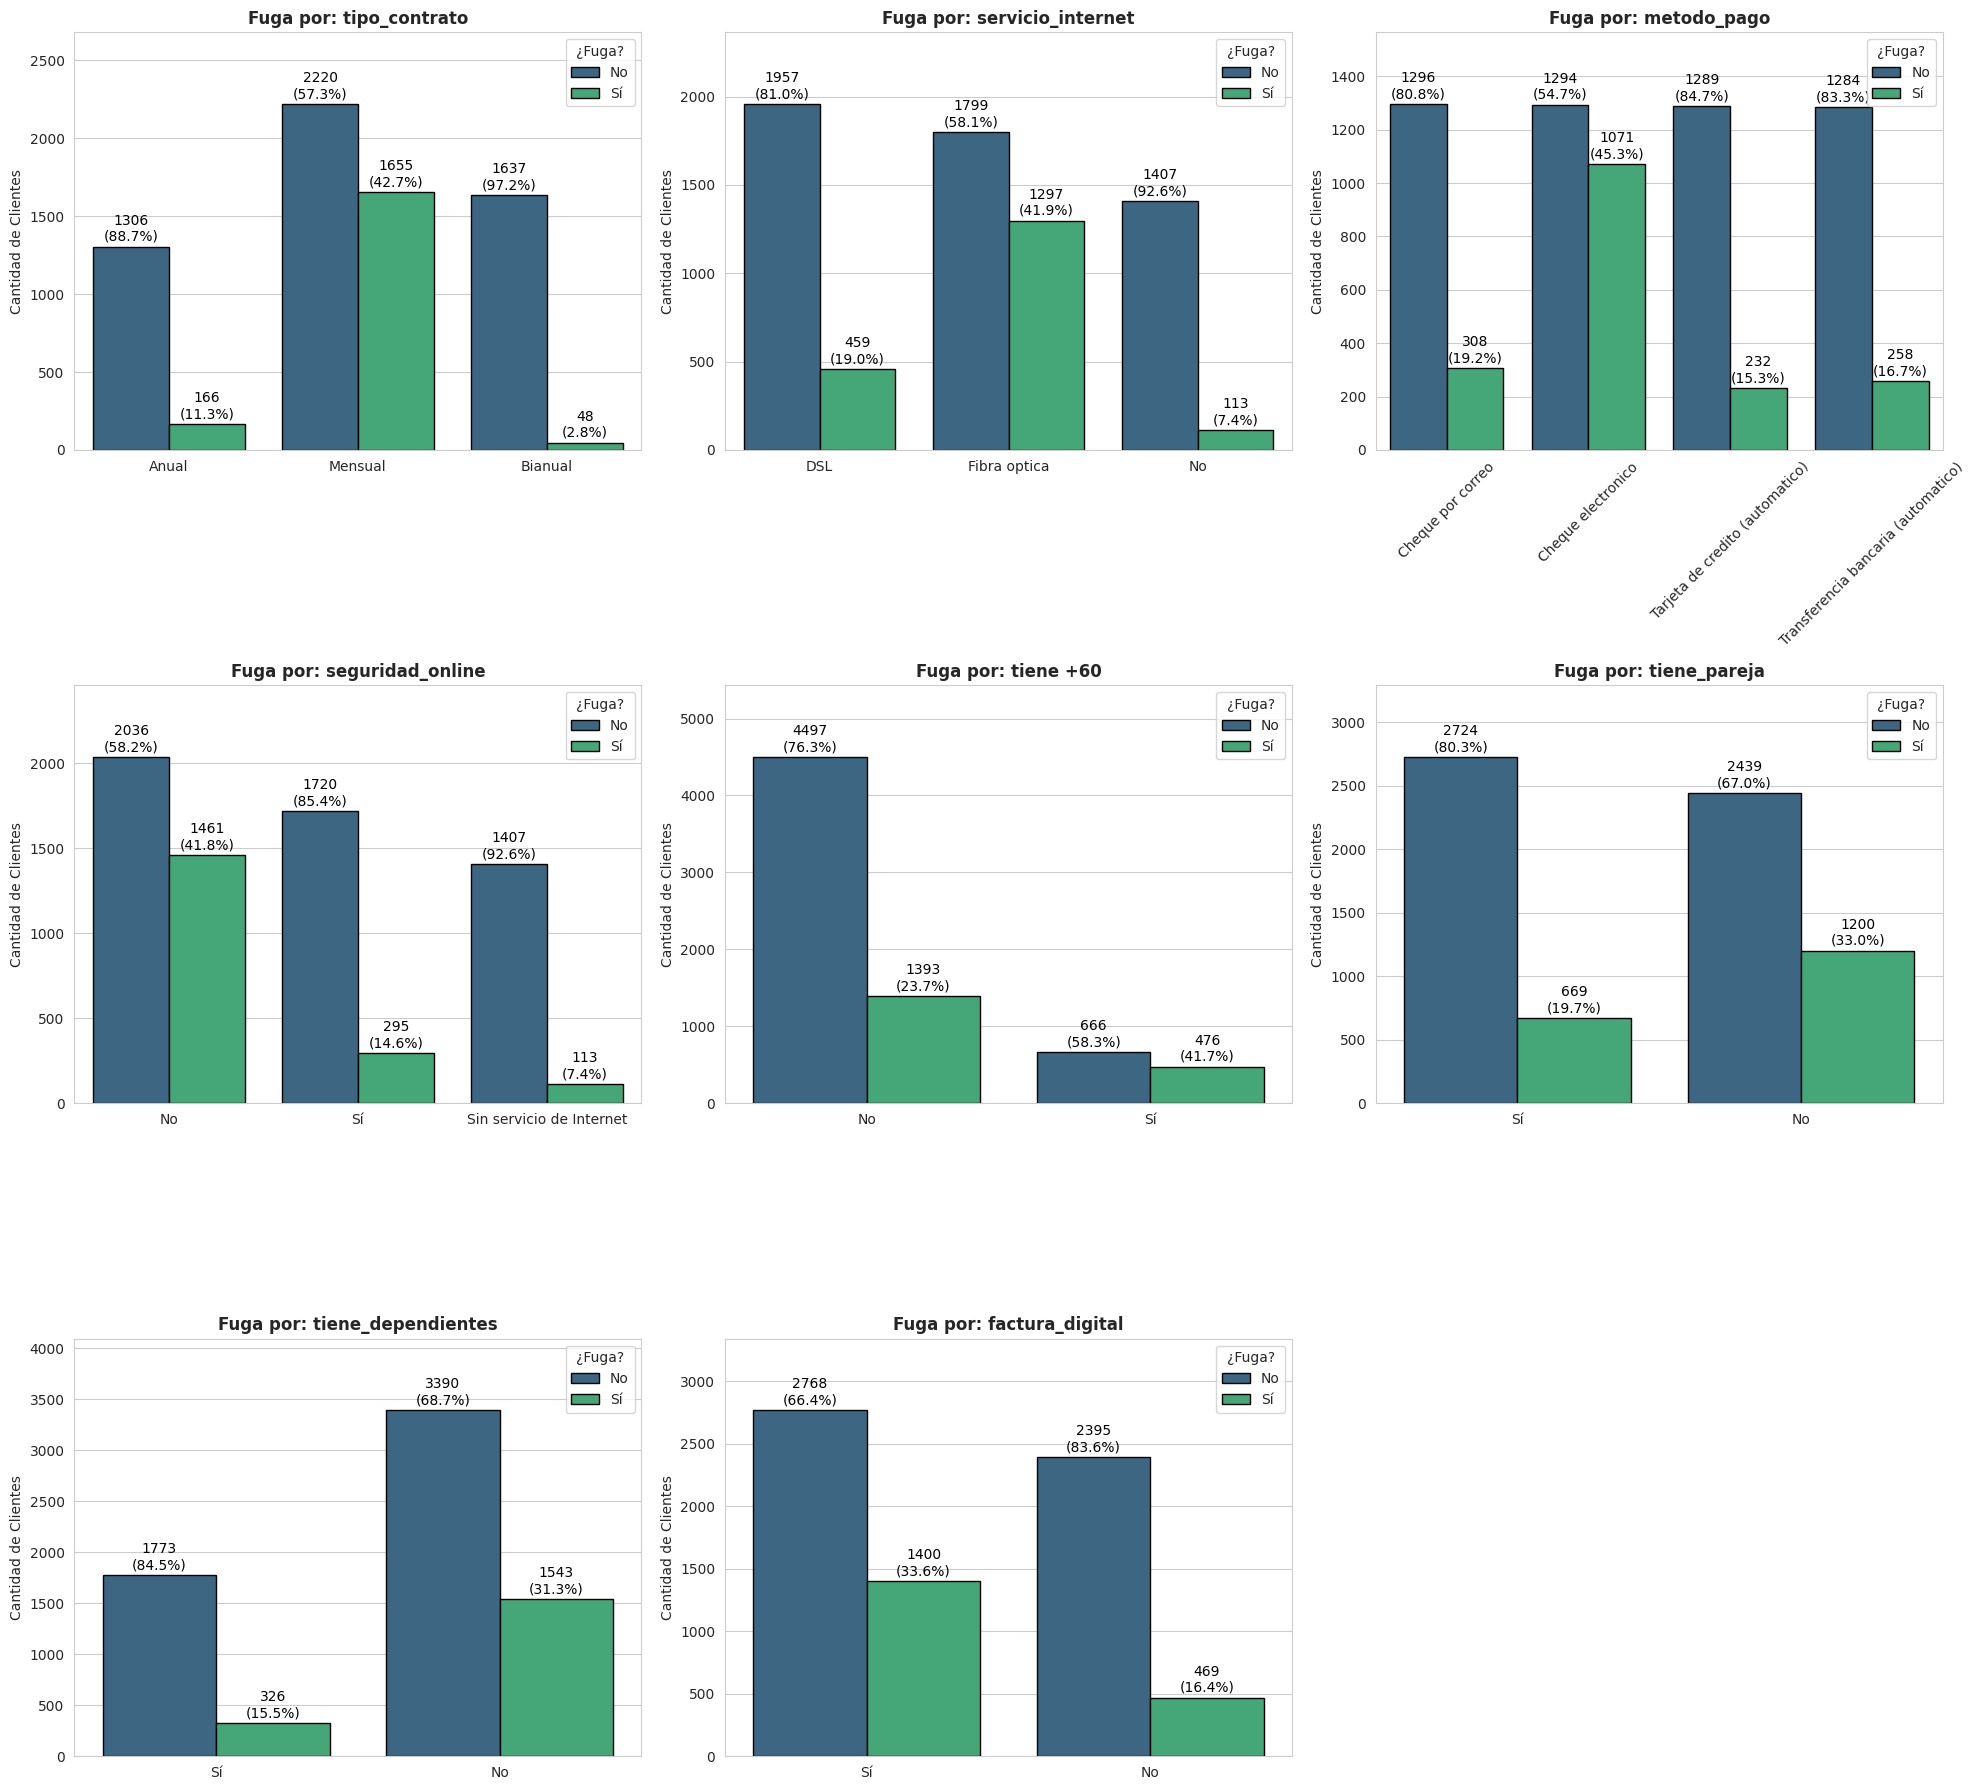

In [74]:
# BLOQUE 1: ANÁLISIS CATEGÓRICO (Con Porcentajes Relativos)
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np

# Configuración
sns.set_style("whitegrid")
palette_colors = "viridis"

columnas_a_analizar = [
    'tipo_contrato',
    'servicio_internet',
    'metodo_pago',
    'seguridad_online',
    'tiene +60',
    'tiene_pareja',
    'tiene_dependientes',
    'factura_digital'
]

num_plots = len(columnas_a_analizar)
cols = 3
rows = math.ceil(num_plots / cols)

fig, axs = plt.subplots(rows, cols, figsize=(20, 6 * rows))
axs = axs.flatten()

for i, col in enumerate(columnas_a_analizar):
    if col in df.columns:
        # Gráfico
        sns.countplot(data=df, x=col, hue='fuga', ax=axs[i], palette=palette_colors, edgecolor="black")

        # Estética
        axs[i].set_title(f'Fuga por: {col}', fontweight='bold', fontsize=12)
        axs[i].set_ylabel('Cantidad de Clientes')
        axs[i].set_xlabel('')
        axs[i].legend(title='¿Fuga?', loc='upper right')

        # Cálculo de Porcentajes
        total_por_categoria = df[col].value_counts()
        xticks_labels = [label.get_text() for label in axs[i].get_xticklabels()]

        for p in axs[i].patches:
            height = p.get_height()
            if math.isfinite(height) and height > 0:
                x_idx = int(np.round(p.get_x() + p.get_width() / 2))
                try:
                    cat_name = xticks_labels[x_idx]
                    total_grupo = total_por_categoria[cat_name]
                except:
                    total_grupo = 1

                porcentaje = 100 * height / total_grupo
                label_text = f'{int(height)}\n({porcentaje:.1f}%)'

                axs[i].annotate(label_text, (p.get_x() + p.get_width() / 2., height),
                                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 2), textcoords='offset points')

        axs[i].set_ylim(0, axs[i].get_ylim()[1] * 1.15)
        if df[col].nunique() > 3: axs[i].tick_params(axis='x', rotation=45)
    else:
        axs[i].axis('off')

for j in range(i + 1, len(axs)): fig.delaxes(axs[j])
plt.tight_layout()
plt.show()

### 2. El "Cuánto": Perfil Financiero (Numéricas) 💰
Este bloque define si perdemos clientes "caros" o "baratos" y qué tan sensibles son al precio.

📝 Insight:

- Existe una relación directa entre el costo mensual y la fuga. El diagrama de caja (boxplot) de Valor Mensual muestra que la mediana de pago de los clientes que se fugan es superior a la de los que se quedan. Esto sugiere una alta sensibilidad al precio: los clientes con facturas más altas son los más propensos a cancelar el servicio.

- Por otro lado, la fuga suele concentrarse en el periodo inicial. Los clientes con mas tiempo de contrato son menos propensos a fugarse.

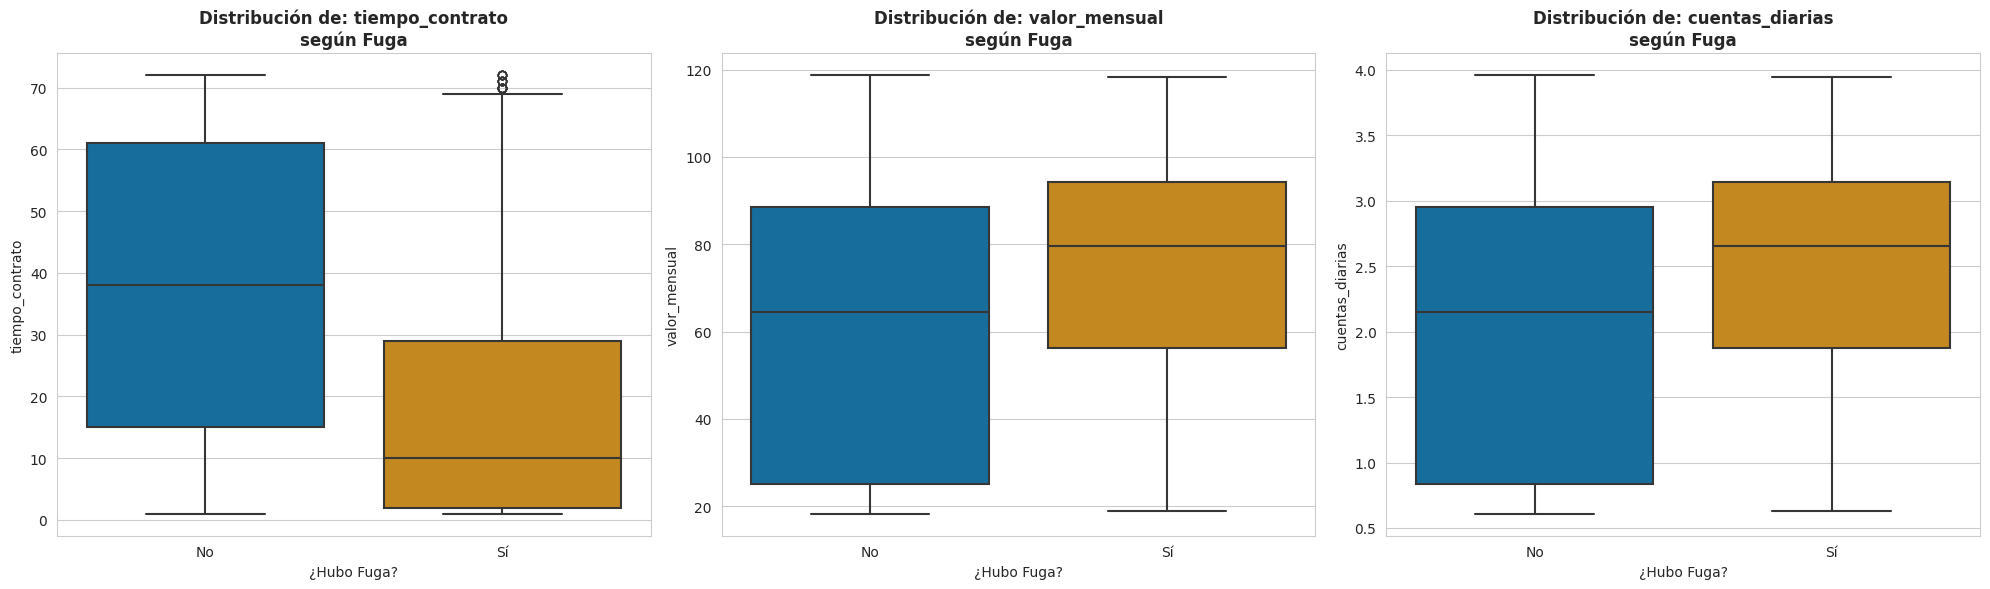

In [66]:
# BLOQUE 2: ANÁLISIS NUMÉRICO (Boxplots)
import matplotlib.pyplot as plt
import seaborn as sns
import math

columnas_numericas = [
    'tiempo_contrato',     # tenure
    'valor_mensual',       # MonthlyCharges
    'cuentas_diarias'
]

sns.set_style("whitegrid")
palette_colors = "colorblind"

num_plots = len(columnas_numericas)
cols = 3
rows = math.ceil(num_plots / cols)

fig, axs = plt.subplots(rows, cols, figsize=(20, 6 * rows))
if num_plots > 1: axs = axs.flatten()
else: axs = [axs]

for i, col in enumerate(columnas_numericas):
    if col in df.columns:
        sns.boxplot(
            data=df,
            x='fuga',
            y=col,
            hue='fuga',     # Fix para Warning
            legend=False,   # Ocultar leyenda
            ax=axs[i],
            palette=palette_colors,
            linewidth=1.5
        )
        axs[i].set_title(f'Distribución de: {col}\nsegún Fuga', fontweight='bold', fontsize=12)
        axs[i].set_xlabel('¿Hubo Fuga?')
        axs[i].set_ylabel(col)
    else:
        if num_plots > 1: axs[i].axis('off')

if num_plots > 1:
    for j in range(i + 1, len(axs)): fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

### 3. El "Cuándo": Evolución y Mortalidad ⏳


📝 Insight:

- El análisis de supervivencia revela un fenómeno crítico de 'mortalidad temprana'.

- El histograma muestra un pico masivo de fugas en los primeros 1 a 5 meses (tiempo_contrato). Si logramos que el cliente supere el primer semestre, la probabilidad de fuga cae drásticamente.

- El Scatter Plot confirma que hay un segmento de alto riesgo: Clientes nuevos (baja antigüedad) con cargos mensuales altos. Esta combinación es letal y representa la mayor pérdida de ingresos.

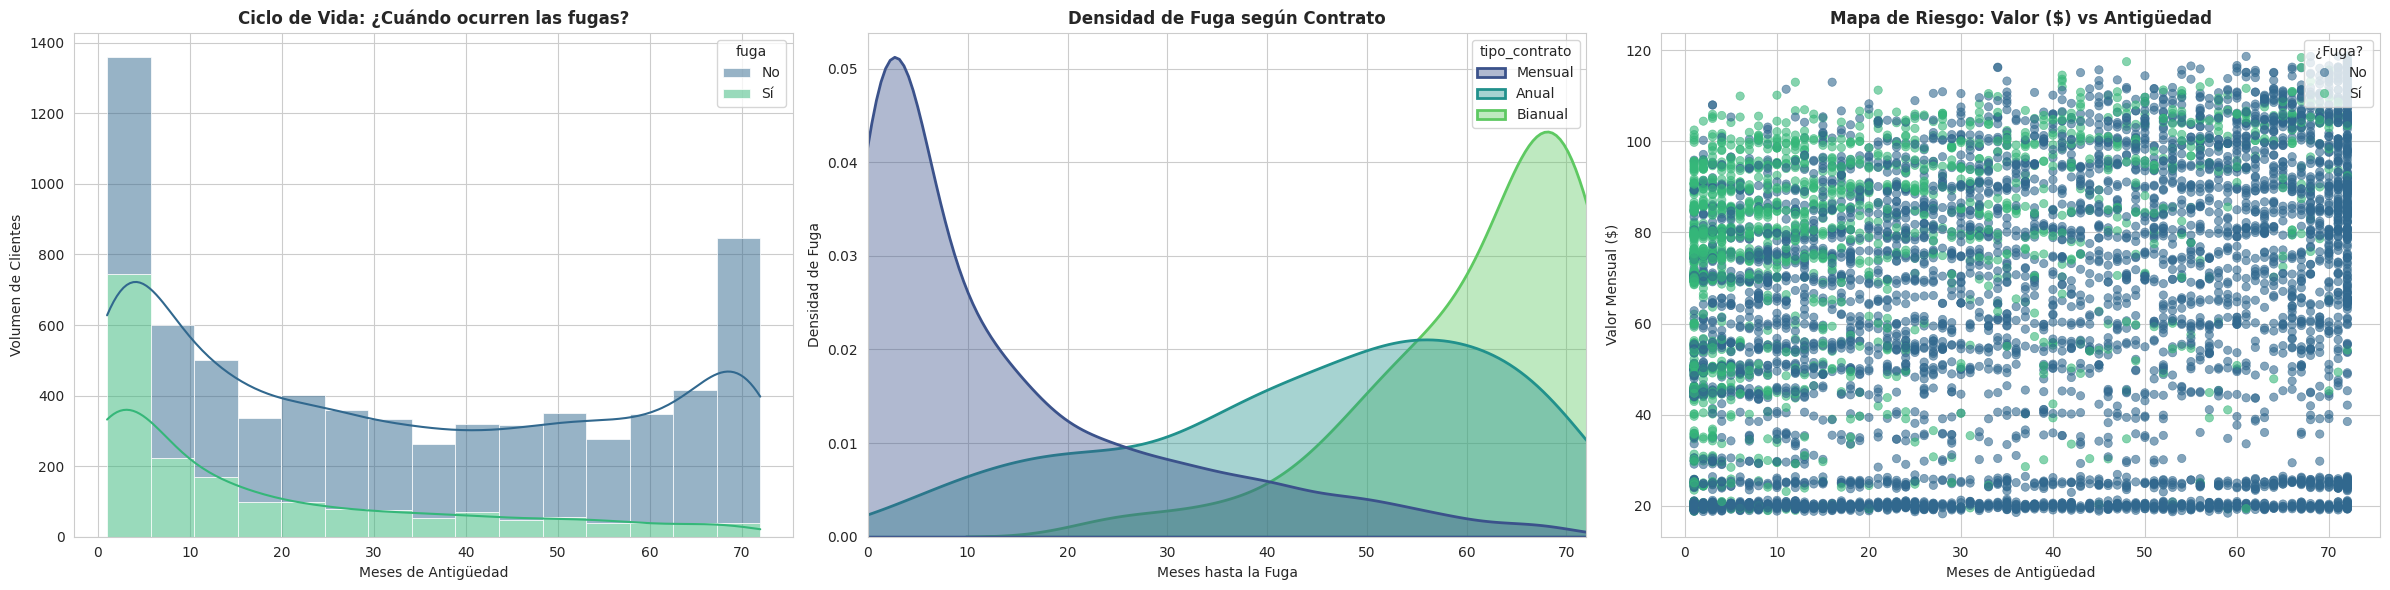

In [75]:
# Bloque 3

import matplotlib.pyplot as plt
import seaborn as sns

# Configuración visual general
sns.set_style("whitegrid")
palette_colors = "viridis"

# Filtramos un DataFrame auxiliar solo con los casos de fuga para analizar su comportamiento
# Buscamos variantes de afirmación para asegurar que capturamos los datos correctamente
valores_fuga = ['Sí', 'Si', 'Yes', 'True', 1]
df_fugados = df[df['fuga'].isin(valores_fuga)].copy()

# Verificamos que existan datos antes de graficar
if not df_fugados.empty:
    fig, axs = plt.subplots(1, 3, figsize=(24, 6))

    # --- Gráfico 1: Histograma de Permanencia ---
    # Muestra la distribución general de clientes (fugados vs no fugados) a lo largo del tiempo
    sns.histplot(
        data=df,
        x='tiempo_contrato',
        hue='fuga',
        multiple="stack",
        kde=True,
        palette=palette_colors,
        ax=axs[0],
        edgecolor="white",
        linewidth=0.5
    )
    axs[0].set_title('Ciclo de Vida: ¿Cuándo ocurren las fugas?', fontweight='bold')
    axs[0].set_ylabel('Volumen de Clientes')
    axs[0].set_xlabel('Meses de Antigüedad')

    # --- Gráfico 2: Curvas de Densidad (KDE) por Contrato ---
    # Visualiza la probabilidad de fuga en el tiempo para cada tipo de contrato.
    # 'common_norm=False' permite comparar la forma de las curvas independientemente del volumen total de cada grupo.
    sns.kdeplot(
        data=df_fugados,
        x='tiempo_contrato',
        hue='tipo_contrato',
        fill=True,
        common_norm=False,
        palette=palette_colors,
        alpha=0.4,
        linewidth=2,
        ax=axs[1]
    )
    axs[1].set_title('Densidad de Fuga según Contrato', fontweight='bold')
    axs[1].set_ylabel('Densidad de Fuga')
    axs[1].set_xlabel('Meses hasta la Fuga')
    axs[1].set_xlim(left=0, right=df['tiempo_contrato'].max())

    # --- Gráfico 3: Relación Valor vs Tiempo ---
    # Identifica patrones de riesgo relacionando el costo mensual con la antigüedad del cliente
    sns.scatterplot(
        data=df,
        x='tiempo_contrato',
        y='valor_mensual',
        hue='fuga',
        palette=palette_colors,
        alpha=0.6,
        ax=axs[2],
        edgecolor=None
    )
    axs[2].set_title('Mapa de Riesgo: Valor ($) vs Antigüedad', fontweight='bold')
    axs[2].set_ylabel('Valor Mensual ($)')
    axs[2].set_xlabel('Meses de Antigüedad')
    axs[2].legend(title='¿Fuga?', loc='upper right')

    plt.tight_layout()
    plt.show()

else:
    print("No se encontraron datos de fuga para generar los gráficos específicos.")

### 4. Extra: Análisis de correlación entre variables

📝 Insight:

- Hay correlación de mayor fuga con mayor costo_mensual y total_cobrado.
- Por otro lado, tiempo_contrato ayuda a mantener la retención del cliente.

Finalmente podemos concluir que a mayor cantidad de servicios extra contratados, disminuye la probabilidad de fuga.
Clientes sin servicios o con solo 1, son mas proclives a la fuga o ser captados por la competencia. Ofrecer paquetes de servicio podria ser una buena estrategia de retención del cliente.

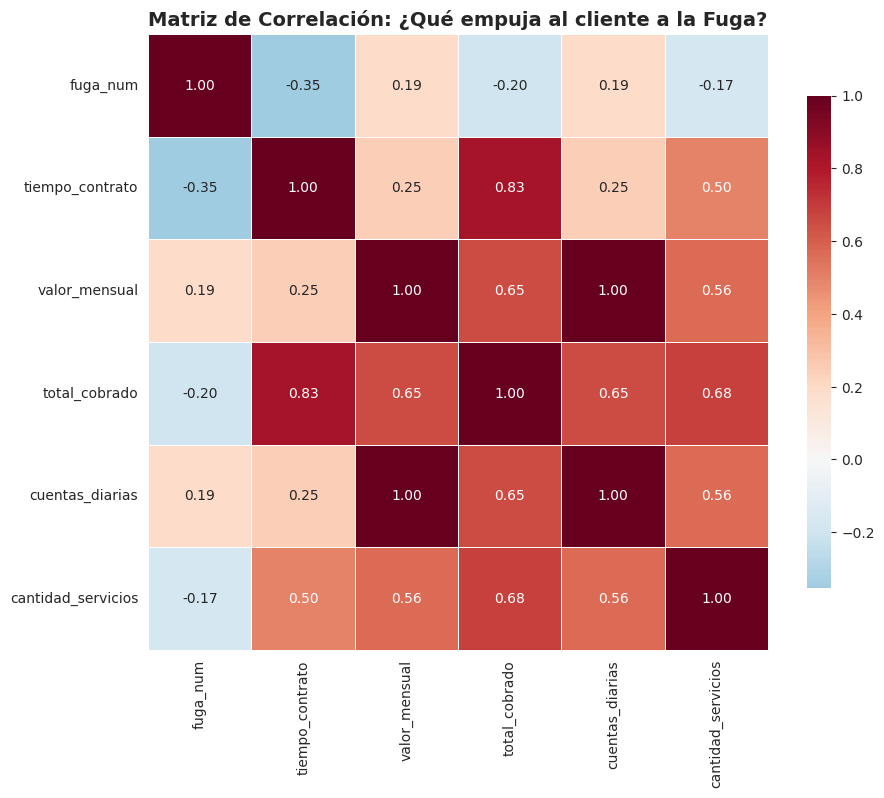

/tmp/ipython-input-1293031279.py:73: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




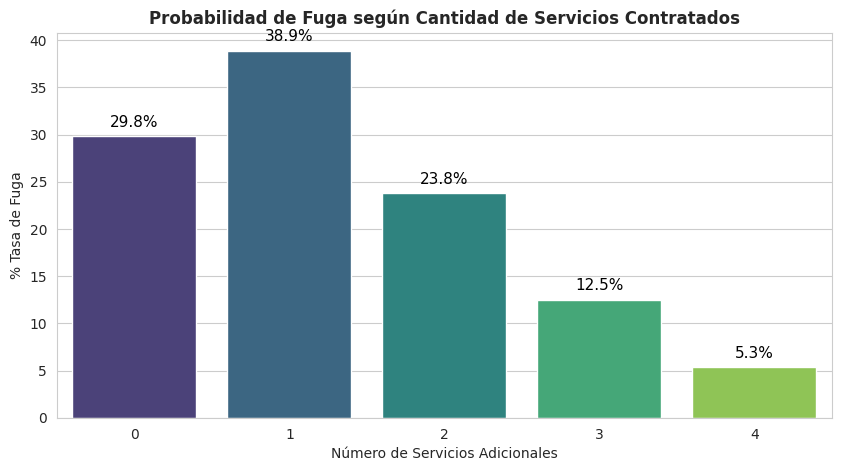

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# --- 1. PREPARACIÓN DE DATOS (Feature Engineering) ---
# Hacemos una copia para no alterar el original
df_corr = df.copy()

# A. Convertir Fuga a Numérico (1 = Se fue, 0 = Se quedó)
# Buscamos variantes de 'Sí' para ser robustos
df_corr['fuga_num'] = df_corr['fuga'].apply(lambda x: 1 if x in ['Sí', 'Si', 'Yes', 'True', 1] else 0)

# B. Calcular 'Cantidad de Servicios'
# Sumamos las columnas de servicios adicionales (si tienen 'Yes' o 'Sí')
# Ajusta esta lista según los nombres exactos de tus columnas de servicios
cols_servicios = [
    'seguridad_online', 'backup_online', 'proteccion_dispositivo',
    'soporte_tecnico', 'tv_streaming', 'peliculas_streaming'
]

# Función para contar servicios (asumiendo que los valores son 'Yes', 'No', 'Sin servicio internet')
def contar_servicios(row):
    contador = 0
    for col in cols_servicios:
        if col in row.index and row[col] in ['Yes', 'Sí', 'Si']:
            contador += 1
    return contador

df_corr['cantidad_servicios'] = df_corr.apply(contar_servicios, axis=1)

# --- 2. MATRIZ DE CORRELACIÓN ---
# Seleccionamos solo las variables numéricas relevantes
cols_numericas = [
    'fuga_num',
    'tiempo_contrato',
    'valor_mensual',
    'total_cobrado',
    'cuentas_diarias', # Tu variable calculada
    'cantidad_servicios' # La nueva variable
]

# Filtramos solo las que existen en el DF
cols_existentes = [c for c in cols_numericas if c in df_corr.columns]
matriz_corr = df_corr[cols_existentes].corr()

# --- 3. VISUALIZACIÓN ---
plt.figure(figsize=(10, 8))
sns.set_style("white")

# Heatmap (Mapa de Calor)
heatmap = sns.heatmap(
    matriz_corr,
    annot=True,       # Muestra los números
    fmt=".2f",        # 2 decimales
    cmap="RdBu_r",    # Rojo (Positivo/Fuga) a Azul (Negativo/Lealtad)
    center=0,         # El 0 es blanco
    linewidths=0.5,
    cbar_kws={"shrink": .8}
)

plt.title('Matriz de Correlación: ¿Qué empuja al cliente a la Fuga?', fontweight='bold', fontsize=14)
plt.yticks(rotation=0)
plt.show()

# --- 4. EXTRA: Impacto de la Cantidad de Servicios ---
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")

# Calculamos tasa de fuga por cantidad de servicios
tasa_fuga_servicios = df_corr.groupby('cantidad_servicios')['fuga_num'].mean() * 100

ax = sns.barplot(
    x=tasa_fuga_servicios.index,
    y=tasa_fuga_servicios.values,
    palette="viridis"
)

ax.set_title('Probabilidad de Fuga según Cantidad de Servicios Contratados', fontweight='bold')
ax.set_ylabel('% Tasa de Fuga')
ax.set_xlabel('Número de Servicios Adicionales')
# Etiquetas de porcentaje
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

## Conclusiones y propuestas finales ⭐

- Trabajar sobre la retencion y planes renovación de los nuevos clientes (especialmente primer mes).
- Ofrecer paquetes de servicios multiples; ayudan a aumentar la retencion.
- Reforzar los planes de largo plazo y metodos de pago automaticos.
- Verificar en profundidad la situación de la fibra optica: reducir la expectativa del servicio, revisar lo tecnico o dirigir campañas de retención especificas.
- Trabajar sobre los clientes más propensos a la fuga: sin dependientes, sin pareja, clientes +60.
- Difundir las ventajas de la seguridad_online, que reduce la cantidad de fuga.